In [1]:
%pylab inline
import pandas as pd

/Users/sgkang/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv("../data/ChungCheonDC/CompositeETCdata.csv")
df_DC = pd.read_csv("../data/ChungCheonDC/CompositeDCdata.csv")
df_DCstd = pd.read_csv("../data/ChungCheonDC/CompositeDCstddata.csv")

,Unnamed: 0,2134,3245,4356,5467,6578,7689,87910,981011,1091112,...,37364546,38374647,39384748,40394849,41404950,42415051,43425152,44435253,45445354,date
0,0,63.84345,66.09970,67.69065,89.47975,81.04410,76.86380,81.09030,69.45025,52.62985,...,84.25525,96.45110,99.13210,82.51245,77.35290,75.41105,70.74580,66.13875,151.79960,2015-01-01
1,1,64.12665,66.34525,67.99035,89.92135,81.35560,76.95140,81.65155,69.89650,53.08180,...,83.82325,96.37420,99.14110,82.52715,77.50845,77.32860,72.01700,64.59440,196.19095,2015-01-02
2,2,64.31660,66.56720,68.25520,90.20550,81.64690,77.02590,81.94750,70.40970,53.82110,...,83.68640,96.24240,99.03590,82.43440,77.35070,76.98420,72.13120,64.69170,44.89400,2015-01-03
3,3,38.68695,40.10530,41.14775,54.28520,49.22445,46.24525,49.62015,42.22920,31.94895,...,50.29575,58.00980,59.68305,49.64645,47.01330,48.40995,43.71540,35.14285,76.87385,2015-01-04
4,4,12.92015,13.41135,13.76705,18.15720,16.44970,15.47975,16.65150,14.09755,10.61750,...,16.74225,19.33945,19.87175,16.53710,15.85995,16.39960,14.25875,11.85625,82.61085,2015-01-05
5,5,64.73690,67.16850,69.57090,90.88410,82.22460,78.00320,84.08220,70.33240,52.36220,...,84.58890,97.25810,99.57770,83.03150,81.68460,83.46580,68.43410,58.01330,83.76780,2015-01-06
6,6,64.68790,67.20010,69.72875,91.09095,80.53285,80.31280,84.06995,70.45825,52.47435,...,84.59965,97.16925,98.71760,82.80425,77.56270,74.59620,70.39175,66.47465,81.43405,2015-01-07
7,7,64.75435,67.27780,69.97565,91.49855,80.65630,80.75105,84.03320,70.68680,52.87395,...,84.73475,97.26035,98.55810,82.95350,77.50615,72.85220,70.35840,65.40760,80.80975,2015-01-08
8,8,64.84250,67.43710,70.15050,91.77090,81.01820,81.44230,83.75610,70.69710,52.95310,...,85.18720,97.30560,98.63440,82.92070,78.17170,101.67700,85.02210,60.67450,68.19540,2015-01-09
9,9,65.00315,67.65530,70.38895,92.16490,82.93330,79.51215,83.96960,70.97800,53.40170,...,85.84030,97.49610,99.09305,82.92690,77.91785,94.04665,84.73255,64.28055,240.47350,2015-01-10


In [3]:
# missininds = np.arange(df_DC[electrodeID[elecind]].values.size)[np.isnan(df_DC[electrodeID[elecind]].values)]
electrodeID = df_DC.keys()[1:-1]

2015-09-13


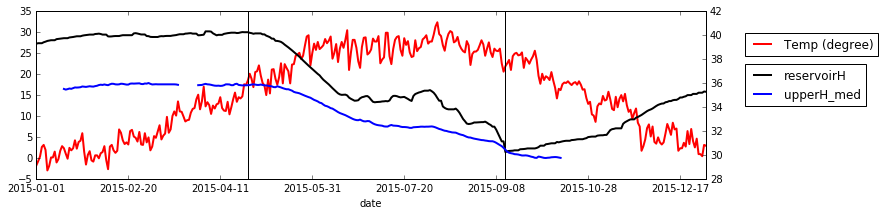

In [4]:
ax1 = plt.subplot(111)
ax1_1 = ax1.twinx()
df.plot(figsize=(12,3), x='date', y='reservoirH', ax=ax1_1, color='k', linestyle='-', lw=2)
df.plot(figsize=(12,3), x='date', y='upperH_med', ax=ax1_1, color='b', linestyle='-', lw=2)
df.plot(figsize=(12,3), x='date', y='Temp (degree)', ax=ax1, color='r', linestyle='-', lw=2)
ax1.legend(loc=3, bbox_to_anchor=(1.05, 0.7))
ax1_1.legend(loc=3, bbox_to_anchor=(1.05, 0.4))
itime_ref0 = 255
itime_ref1 = 115
ax1.plot(np.r_[itime_ref0, itime_ref0], np.r_[-5, 35], 'k-')
ax1.plot(np.r_[itime_ref1, itime_ref1], np.r_[-5, 35], 'k-')
print df['date'].values[itime_ref0]

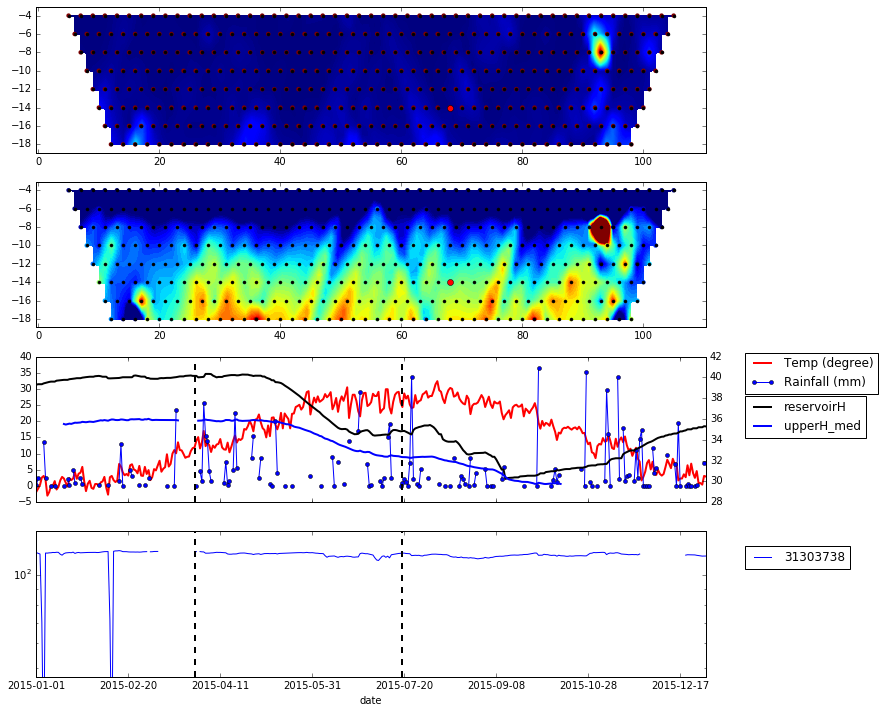

In [10]:
from ipywidgets import interact, IntSlider, ToggleButtons
itime = 93
itime_ref = 86
print df['date'].values[itime]
elecind = [53, 110, 300]
# vizDCtimeSeries(elecind, itime, itime_ref, ['k','b','r'])
viz = lambda idatum, itime, flag: vizDCtimeSeries([idatum], itime, itime_ref, ['r'], flag)
interact(viz, idatum=IntSlider(min=0, max=379, step=1, value=294)\
         ,itime=IntSlider(min=0, max=360, step=1, value=200)\
         ,flag=ToggleButtons(options=["std", "rho"]))

/Users/sgkang/anaconda/lib/python2.7/site-packages/pandas/tools/plotting.py:968: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


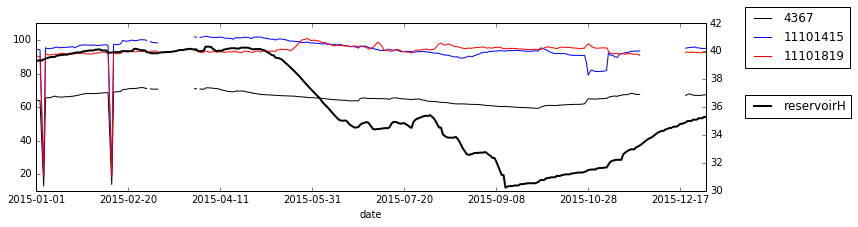

In [6]:
ax1 = plt.subplot(111)
ax1_1 = ax1.twinx()
df_DC.plot(figsize=(12,3), x='date', y=electrodeID[elecind], ax=ax1, colors=['k', 'b', 'r'])
df.plot(figsize=(12,3), x='date', y='reservoirH', ax=ax1_1, color='k', linestyle='-', lw=2)
ax1.legend(loc=3, bbox_to_anchor=(1.05, 0.7))
ax1_1.legend(loc=3, bbox_to_anchor=(1.05, 0.4))
ax1.set_yscale('linear')

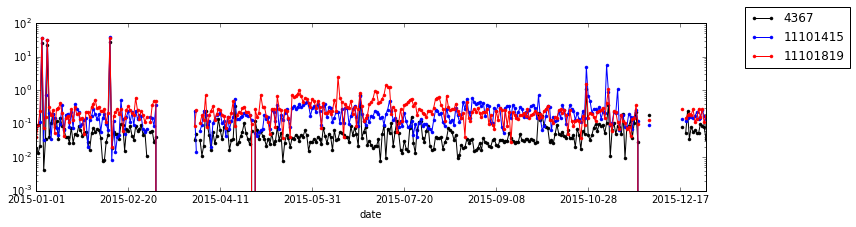

In [7]:
ax1 = plt.subplot(111)
df_DCstd.plot(figsize=(12,3), x='date', y=electrodeID[elecind], ax=ax1, colors=['k', 'b', 'r'], linestyle="-", marker='.', lw=1)
ax1.set_yscale('log')
ax1.legend(loc=3, bbox_to_anchor=(1.05, 0.7))

In [8]:
sys.path.append("../codes/")
from DCdata import readReservoirDC_all
directory = "../data/ChungCheonDC/"
dat_temp,height_temp, ID = readReservoirDC_all(directory+"20151231180000.apr")

In [9]:
from scipy import interpolate
locs = dat_temp[:,:4]
mida = locs[:,:2].sum(axis=1)
midb = locs[:,2:].sum(axis=1)
mid = (mida + midb)*0.5
dz = mida-midb
x = np.linspace(mid.min(), mid.max(), 100)
z = np.linspace(dz.min(), dz.max(), 100)
grid_x, grid_z = np.meshgrid(x,z)

def vizDCtimeSeries(idatum, itime, itime_ref, colors, flag):
    fig = plt.figure(figsize = (12, 12))
    ax1 = plt.subplot(411)
    ax2 = plt.subplot(412)
    
    valsratio = df_DC[electrodeID].values[itime,:].flatten() / df_DC[electrodeID].values[itime_ref,:].flatten()
    valsDC = np.log10(df_DC[electrodeID].values[itime,:].flatten())
    valsDCstd = df_DCstd[electrodeID].values[itime,:].flatten()
    grid_rho_ratio = griddata(mid, dz, valsratio, grid_x, grid_z, interp='linear')
    grid_rho_ratio = grid_rho_ratio.reshape(grid_x.shape)
    if flag =="std":
        vmin, vmax = 0, 10
        grid_rho = griddata(mid, dz, valsDCstd, grid_x, grid_z, interp='linear')        
    elif flag =="rho":
        vmin, vmax = np.log10(20), np.log10(200)
        grid_rho = griddata(mid, dz, valsDC, grid_x, grid_z, interp='linear')
    grid_rho = grid_rho.reshape(grid_x.shape)
        
    
    ax1.contourf(grid_x, grid_z, grid_rho, 200, vmin =vmin, vmax = vmax, clim=(vmin, vmax), cmap="jet")    
    vmin, vmax = 0.9, 1.1
    ax2.contourf(grid_x, grid_z, grid_rho_ratio, 200, vmin =vmin, vmax = vmax, clim=(vmin, vmax), cmap="jet")        
    ax1.scatter(mid, dz, s=20, c = valsDC, edgecolor="None", vmin =vmin, vmax = vmax, clim=(vmin, vmax))
    ax1.plot(mid, dz, 'k.')
    ax2.scatter(mid, dz, s=20, c = valsratio, edgecolor="None", vmin =vmin, vmax = vmax, clim=(vmin, vmax))
    ax2.plot(mid, dz, 'k.')
    
    for i in range(len(colors)):
        ax1.plot(mid[idatum[i]], dz[idatum[i]], 'o', color=colors[i])    
        ax2.plot(mid[idatum[i]], dz[idatum[i]], 'o', color=colors[i])    
        

    ax3 = plt.subplot(413)
    ax3_1 = ax3.twinx()
    df.plot(x='date', y='reservoirH', ax=ax3_1, color='k', linestyle='-', lw=2)
    df.plot(x='date', y='upperH_med', ax=ax3_1, color='b', linestyle='-', lw=2)
    df.plot(x='date', y='Temp (degree)', ax=ax3, color='r', linestyle='-', lw=2)
    df.plot(x='date', y='Rainfall (mm)', ax=ax3, color='b', linestyle='-', marker="o", ms=4)
    ax3.legend(loc=3, bbox_to_anchor=(1.05, 0.7))
    ax3_1.legend(loc=3, bbox_to_anchor=(1.05, 0.4))
    itime_ref0 = itime_ref
    itime_ref1 = itime
    ax3.plot(np.r_[itime_ref0, itime_ref0], np.r_[-5, 40], 'k--', lw=2)
    ax3.plot(np.r_[itime_ref1, itime_ref1], np.r_[-5, 40], 'k--', lw=2)

    ax4 = plt.subplot(414)
    df_DC.plot(x='date', y=electrodeID[idatum], ax=ax4)
    ax4.legend(loc=3, bbox_to_anchor=(1.05, 0.7))
    ax4.set_yscale('log')
    temp = df_DC[electrodeID[elecind]].values
    vmax = np.median(temp[~np.isnan(temp)]) + np.std(temp[~np.isnan(temp)])*3
    vmin = np.median(temp[~np.isnan(temp)]) - np.std(temp[~np.isnan(temp)])*3
    ax4.plot(np.r_[itime_ref1, itime_ref1], np.r_[vmin, vmax], 'k--', lw=2)
    ax4.plot(np.r_[itime_ref0, itime_ref0], np.r_[vmin, vmax], 'k--', lw=2)
    
    ax4.set_ylim(vmin, vmax)
    